# TODO:



In [377]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set_style("darkgrid")

dam_levels = pd.read_csv('data/Dam-levels-clean-20120101-20171206.csv')
dam_levels['date'] = pd.to_datetime(dam_levels['date'])

# Add some date-related fields that will be useful later
dam_levels['year'] = dam_levels['date'].dt.year
dam_levels['month'] = dam_levels['date'].dt.month
dam_levels['monthname'] = dam_levels['date'].dt.strftime('%b')
dam_levels['week'] = dam_levels['date'].dt.week
dam_levels['dayofmonth'] = dam_levels['date'].dt.day
dam_levels['dayofyear'] = dam_levels['date'].dt.dayofyear
dam_levels['daymonth'] = dam_levels['dayofmonth'].apply(str) + '-' + dam_levels['monthname']
dam_levels['daymonthyear'] = dam_levels['dayofmonth'].apply(str) + '-' + dam_levels['monthname'] + '-' + dam_levels['year'].apply(str)

There are 14 dams in the dataset.

In [559]:
capacity.sort_values('max_storage_ml', ascending = 0)[1:]

,max_storage_ml,unavailable_storage_ml
dam_name,,
Theewaterskloof,480187.999929,48018.799993
Voëlvlei,164094.999989,16409.499999
Berg River,130010.000002,13001.000000
Wemmershoek,58643.999996,5864.400000
Steenbras Lower,33517.000003,3351.700000
Steenbras Upper,31767.000001,3176.700000


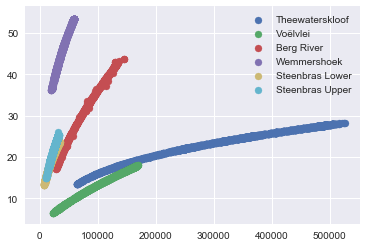

In [560]:
dam_labels = capacity.sort_values('max_storage_ml', ascending = 0)[1:].index

for dam in dam_labels:
    dam_df = dam_levels.loc[dam_levels['dam_name'] == dam]
    plt.scatter(dam_df['storage_ml'], dam_df['height_m'], label = dam)
plt.legend();

In [528]:
dam_levels.pivot_table(index = 'date', columns = 'dam_name', values = 'storage_ml').corr()

dam_name,Berg River,Steenbras Lower,Steenbras Upper,Theewaterskloof,Voëlvlei,Wemmershoek
dam_name,,,,,,
Berg River,1.000000,0.859436,0.782166,0.921385,0.886993,0.876854
Steenbras Lower,0.859436,1.000000,0.737891,0.870402,0.829767,0.904825
Steenbras Upper,0.782166,0.737891,1.000000,0.642192,0.682243,0.717032
Theewaterskloof,0.921385,0.870402,0.642192,1.000000,0.922401,0.948694
Voëlvlei,0.886993,0.829767,0.682243,0.922401,1.000000,0.922894
Wemmershoek,0.876854,0.904825,0.717032,0.948694,0.922894,1.000000
